Real world data is messy and often contains a lot of missing values. There could be multiple reasons for the missing values but primarily the reason for missingness can be attributed to

# How can we address this?

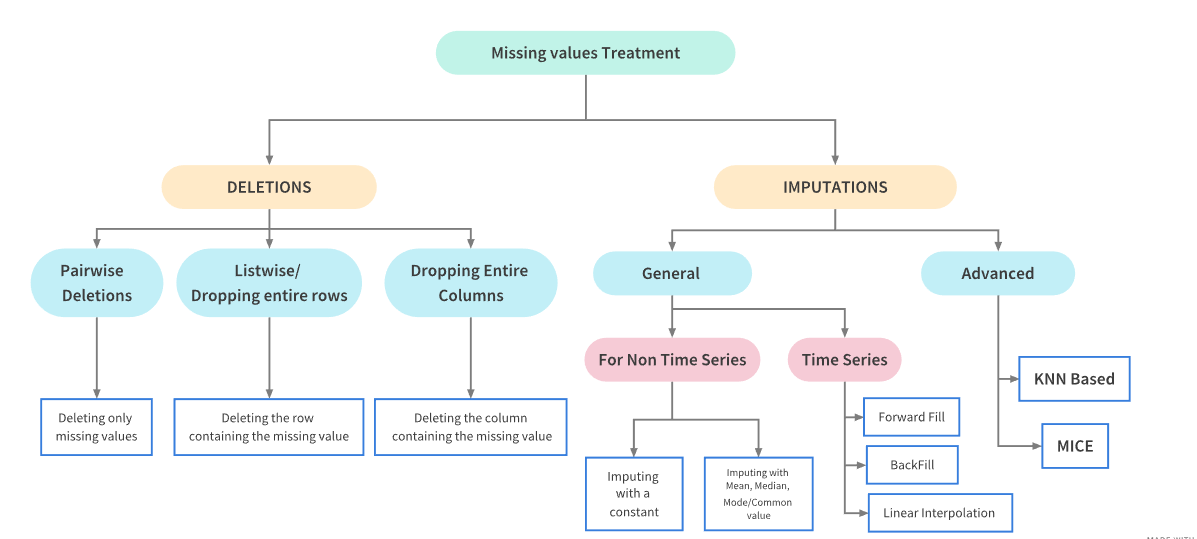

In [163]:
from IPython.display import Image
Image(filename='68u0dD2.png')

In [164]:
import pandas as pd
import numpy as np

In [165]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [166]:
print("training set size :", train.shape)
print("test set size: ", test.shape)

training set size : (891, 12)
test set size:  (418, 11)


In [167]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(len(df.columns)) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [169]:
print(missing_values_table(train))
print("                   ")
print("                   ")
print(missing_values_table(test))


Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
Cabin                687               77.1
Age                  177               19.9
Embarked               2                0.2
                   
                   
Your selected dataframe has 11 columns.
There are 3 columns that have missing values.
       Missing Values  % of Total Values
Cabin             327               78.2
Age                86               20.6
Fare                1                0.2


In [170]:
print(train.Survived.value_counts(normalize=True))
print("           ")
print("We can observe that there is a Skewness towards Non Survivors\nwhich makes sense when we are analyzing a tragedy like the Titanic")

0    0.616162
1    0.383838
Name: Survived, dtype: float64
           
We can observe that there is a Skewness towards Non Survivors
which makes sense when we are analyzing a tragedy like the Titanic


In [171]:
!pip install missigno

ERROR: Could not find a version that satisfies the requirement missigno (from versions: none)
ERROR: No matching distribution found for missigno


In [172]:
import missingno as msno

Missigno is a library focused on plotting missing value information

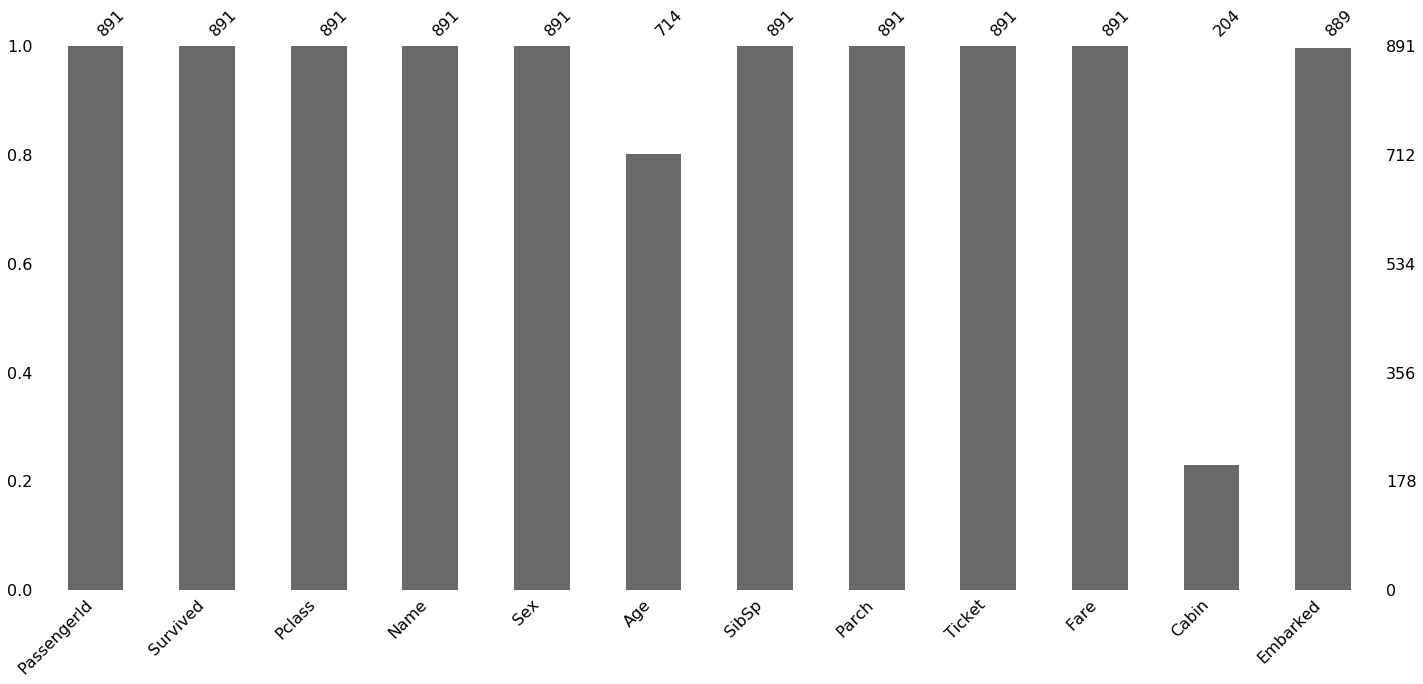

In [173]:
msno.bar(train)

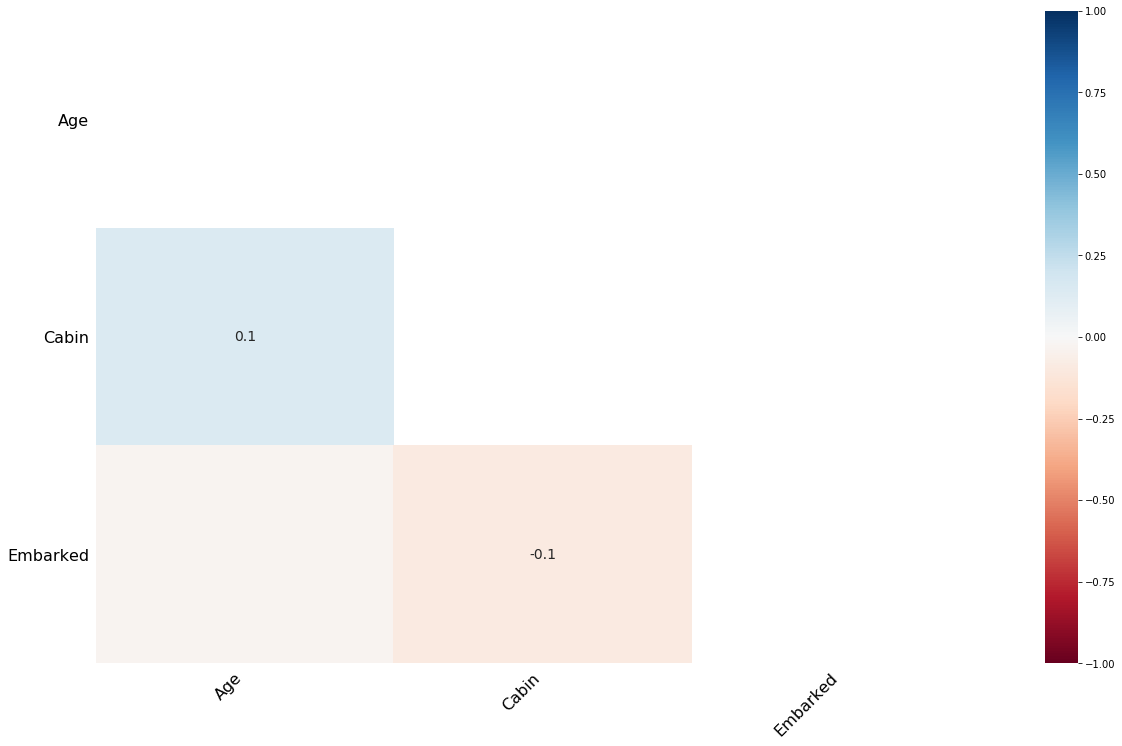

In [174]:
msno.heatmap(train)

It appears to be no (linear) connection between missing features

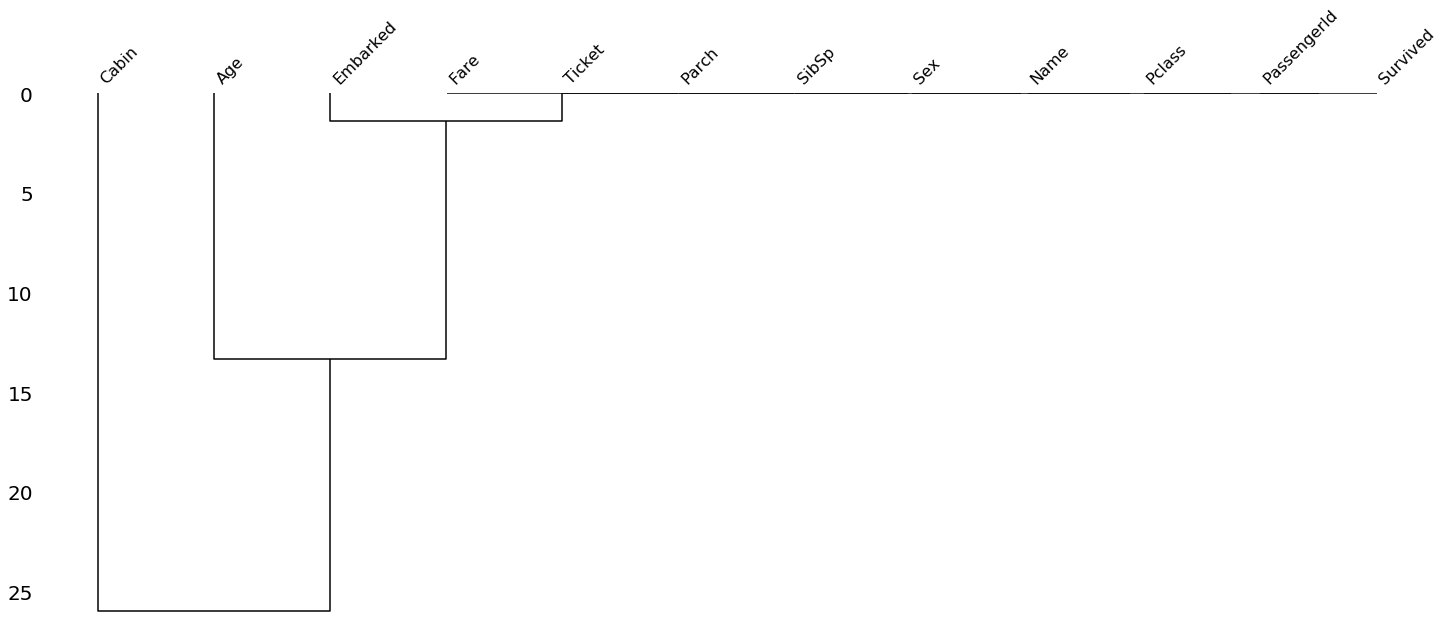

In [175]:
msno.dendrogram(train)

Let's read the above dendrogram from a top-down perspective:

Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on(missingno documentation)

the missingness of Embarked tends to be more similar to Age than to Cabin and so on.However, in this particluar case, the correlation is high since Embarked column has a very few missing values.
This dataset doesn't have much missing values but if you use the same methodology on datasets having a lot of missing values, some interesting pattern will definitely emerge.

In [176]:
print(train.isnull().sum())

print(len(train))


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
891


In [177]:
train.groupby(['Sex','Pclass','SibSp'])['Age'].mean()

Sex     Pclass  SibSp
female  1       0        34.000000
                1        36.441176
                2        30.666667
                3        23.500000
        2       0        30.440476
                1        27.321429
                2        17.333333
                3        30.000000
        3       0        22.866071
                1        27.232143
                2         9.083333
                3        11.000000
                4         8.333333
                5        16.000000
                8              NaN
male    1       0        42.738806
                1        38.481290
                2        47.000000
                3        19.000000
        2       0        32.870597
                1        27.407407
                2        20.200000
        3       0        29.012539
                1        23.057143
                2        28.666667
                3         5.333333
                4         6.416667
                5         8.75000

In [178]:
train['Age']=train['Age'].fillna(train.groupby(['Sex','Pclass','SibSp'])['Age'].transform('mean'))

In [179]:
print(train.isnull().sum())

print(len(train))


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              7
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
891


In [180]:
import seaborn as sns

In [181]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [182]:
train.drop(columns=['Cabin','Name','Ticket'],inplace=True)

In [183]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [184]:
train=train.dropna()

In [185]:
train.isnull().sum()
len(train)

882

In [186]:
from sklearn.model_selection import train_test_split


In [187]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [188]:
train=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)

In [189]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [190]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,445.716553,0.385488,2.306122,29.584250,0.464853,0.369615,31.799432,0.649660,0.087302,0.722222
std,256.512176,0.486986,0.835742,13.353599,0.883324,0.796919,49.781845,0.477347,0.282437,0.448157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.500000,0.000000,3.000000,29.012539,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,666.750000,1.000000,3.000000,36.000000,1.000000,0.000000,30.500000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [191]:
X=train.drop(columns='Survived')
y=train['Survived']

In [192]:
from sklearn.preprocessing import StandardScaler

In [195]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.9,random_state=42)

In [196]:
import xgboost as xgb

In [197]:
from sklearn.model_selection import GridSearchCV

In [201]:
parameters = {
    'n_estimators':[280,320],
    'max_depth':[4,5,6,7,8,9,10,11,12],
    'gamma':[1,2,3],
    #'max_delta_step':[0,1,2],
    'min_child_weight':[1,2,3], 
    #'colsample_bytree':[0.55,0.65],
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[1,0.9,0.8],
    'base_score':[0.5]
}

grid =GridSearchCV(xgb.XGBClassifier(), parameters, cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)

xg_boost = grid.best_estimator_
xg_boost


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 7275 out of 7290 | elapsed:   47.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 7290 out of 7290 | elapsed:   47.6s finished


0.8176470588235294


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=280, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [202]:
xg_boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=280, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
pred=xg_boost.predict(X_test)

In [208]:
from sklearn.model_selection import cross_val_score

In [209]:
print(xg_boost.score(X_train, y_train))

scores =cross_val_score(xg_boost, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print("Kfold on XGBClassifier: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

0.8977272727272727
[0.77777778 0.88888889 0.83333333 0.70588235 0.88235294]
Kfold on XGBClassifier: 0.8176 (+/- 0.0687)
